In [ ]:
# Making Necessary imports

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn
import numpy as np
import random
from collections import namedtuple, deque
from torch.distributions import Categorical
from SingleEchelonEnvironment import Environment
from QNetwork import Agent, QNetwork, dqn
from HelperFunction import generate_random_demand, generate_multiple_test_scenarios, profit_calculation_sS
from A2C import Actor, Critic, Memory, A2C_training
import matplotlib.pyplot as plt
import pickle

np.random.seed(0)
torch.manual_seed(0)

In [ ]:
#Environment Variables
BUFFER_SIZE = int(5*1e5)  #replay buffer size
BATCH_SIZE = 128      # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3             # for soft update of target parameters
LR = 1e-4            # learning rate
UPDATE_EVERY = 4      # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Generating random historic data

demand_records = generate_random_demand()

In [ ]:
def t(x): return torch.from_numpy(x).float()

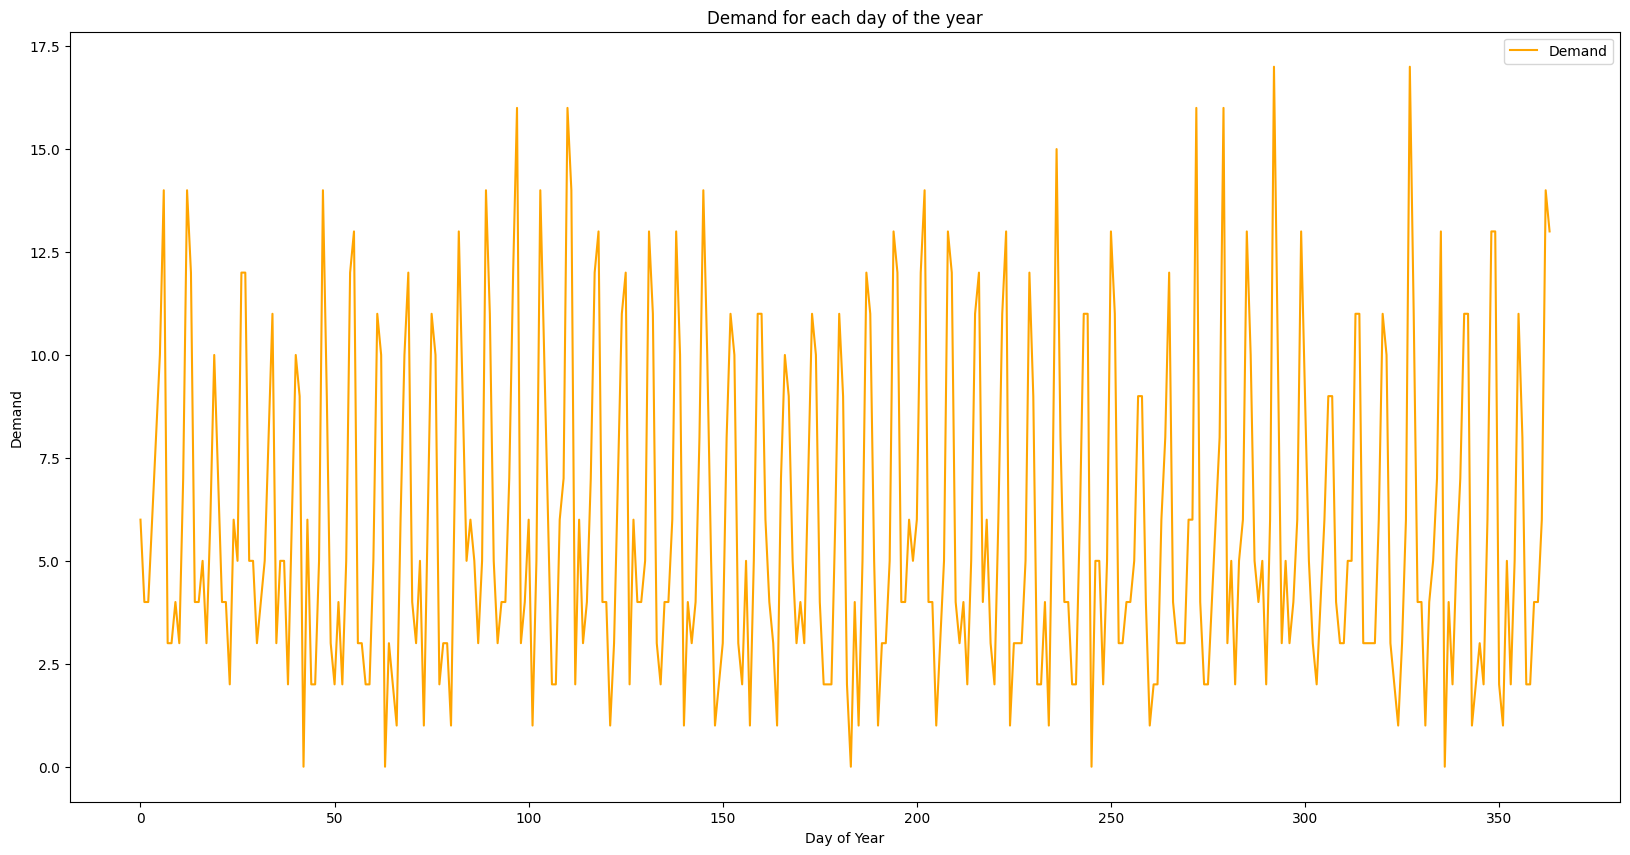

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(demand_records, label = 'Demand', color = 'orange')
plt.xlabel('Day of Year')
plt.ylabel('Demand')
plt.title('Demand for each day of the year')
plt.legend(loc = 'upper right')

In [ ]:
# actor = Actor(7, 21)
# critic = Critic(7)
# adam_actor = torch.optim.Adam(actor.parameters(), lr=1e-3)
# adam_critic = torch.optim.Adam(critic.parameters(), lr=1e-3)
# memory = Memory()
# max_steps = 200

In [ ]:
# # Training using A2C
# def train(memory, q_val):
#     values = torch.stack(memory.values)
#     q_vals = np.zeros((len(memory), 1))

#     for i, (_, _, reward, done) in enumerate(memory.reversed()):
#         q_val = reward + GAMMA*q_val*(1.0-done)
#         q_vals[len(memory)-1 - i] = q_val

#     advantage = torch.Tensor(q_vals) - values

#     critic_loss = advantage.pow(2).mean()
#     adam_critic.zero_grad()
#     critic_loss.backward()
#     adam_critic.step()

#     actor_loss = (-torch.stack(memory.log_probs)*advantage.detach()).mean()
#     adam_actor.zero_grad()
#     actor_loss.backward()
#     adam_actor.step()

In [ ]:
#Creating the Environment
env = Environment(demand_records)

In [ ]:
# def A2C_training():
#   A2C_episode_rewards = []
#   A2C_action_list = []
#   for i in range(500):
#     done = False
#     total_reward = 0
#     state = env.reset()
#     steps = 0
#     while not done:
#       probs = actor(t(state))
#       dist = torch.distributions.Categorical(probs=probs)
#       action = dist.sample()
#       next_state, reward, done, info = env.step(action.detach().data.numpy())

#       total_reward += reward
#       steps += 1
#       memory.add(dist.log_prob(action), critic(t(state)), reward, done)
#       state = next_state

#       if done or (steps % max_steps == 0):
#         last_q_val = critic(t(next_state)).detach().data.numpy()
#         train(memory, last_q_val)
#         memory.clear()
#         if(i % 20 == 0):
#           print(f'Episode Number: {i} Reward: {reward}')
#     A2C_episode_rewards.append(total_reward)
#     A2C_action_list.append(action)
#   return A2C_episode_rewards, A2C_action_list

In [ ]:
# with open('A2C_episodic_rewards.pkl', 'rb') as file:
#     A2C_episode_rewards = pickle.load(file)

In [ ]:
A2C_episode_rewards, A2C_action_list = A2C_training(env, 900)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Episode Number: 0 Reward: -124.0
Episode Number: 0 Reward: 149.0
Episode Number: 20 Reward: -131.0
Episode Number: 20 Reward: 100.0
Episode Number: 40 Reward: -39.0
Episode Number: 40 Reward: 189.0
Episode Number: 60 Reward: -160.0
Episode Number: 60 Reward: 142.0
Episode Number: 80 Reward: -170.0
Episode Number: 80 Reward: 192.0
Episode Number: 100 Reward: -120.0
Episode Number: 100 Reward: 189.0
Episode Number: 120 Reward: -108.0
Episode Number: 120 Reward: 170.0
Episode Number: 140 Reward: -220.0
Episode Number: 140 Reward: 79.0
Episode Number: 160 Reward: -61.0
Episode Number: 160 Reward: 209.0
Episode Number: 180 Reward: -130.0
Episode Number: 180 Reward: 218.0
Episode Number: 200 Reward: -109.0
Episode Number: 200 Reward: 191.0
Episode Number: 220 Reward: -34.0
Episode Number: 220 Reward: 209.0
Episode Number: 240 Reward: 60.0
Episode Number: 240 Reward: 182.0
Episode Number: 260 Reward: -88.0
Episode Number: 260 Reward: -8.0
Episode Number: 280 Reward: 66.0
Episode Number: 280 R

In [ ]:
# with open('A2C_episodic_rewards.pkl', 'wb') as file:
#     pickle.dump(A2C_episode_rewards, file)
# with open('A2C_episodic_actions.pkl', 'wb') as file:
#     pickle.dump(A2C_action_list, file)

In [ ]:
DQN_episodic_rewards, DQN_episodic_actions = dqn(env, n_episodes = 900)

episode1: -39846.0
episode2: -38471.0
episode3: -40980.0
episode4: -39476.0
episode5: -36972.0
episode6: -38560.0
episode7: -33428.0
episode8: -34800.0
episode9: -35907.0
episode10: -38237.0
episode11: -37726.0
episode12: -35595.0
episode13: -38809.0
episode14: -32307.0
episode15: -34805.0
episode16: -34696.0
episode17: -27047.0
episode18: -31131.0
episode19: -32677.0
episode20: -38182.0
episode21: -27721.0
episode22: -34868.0
episode23: -30531.0
episode24: -30632.0
episode25: -28831.0
episode26: -34638.0
episode27: -32750.0
episode28: -29058.0
episode29: -26709.0
episode30: -30611.0
episode31: -28429.0
episode32: -27987.0
episode33: -26226.0
episode34: -29654.0
episode35: -28270.0
episode36: -25765.0
episode37: -19159.0
episode38: -25128.0
episode39: -27162.0
episode40: -25819.0
episode41: -22266.0
episode42: -24727.0
episode43: -21407.0
episode44: -29057.0
episode45: -24283.0
episode46: -16517.0
episode47: -21548.0
episode48: -24126.0
episode49: -19293.0
episode50: -24833.0
episode51

In [ ]:
# with open('DQN_episodic_rewards.pkl', 'rb') as file:
#     DQN_episodic_rewards = pickle.load(file)

In [ ]:
with open('DQN_episodic_rewards.pkl', 'wb') as file:
    pickle.dump(DQN_episodic_rewards, file)
with open('DQN_episodic_actions.pkl', 'wb') as file:
    pickle.dump(DQN_episodic_actions, file)

In [ ]:
from PPO import PPOAgent, train

In [ ]:
agent = PPOAgent(7, 21, 0.01, 0.01, 0.99, 0.2)

In [ ]:
ppo_rewards, ppo_actions = train(env, agent, num_episodes=900)

/content/PPO.py:65: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  states = torch.FloatTensor(states).to(device)


Episode 0, Total Reward: -49217.0
Episode 10, Total Reward: -46514.0
Episode 20, Total Reward: -41519.0
Episode 30, Total Reward: -38076.0
Episode 40, Total Reward: -42320.0
Episode 50, Total Reward: -38736.0
Episode 60, Total Reward: -41661.0
Episode 70, Total Reward: -37831.0
Episode 80, Total Reward: -41289.0
Episode 90, Total Reward: -39077.0
Episode 100, Total Reward: -39733.0
Episode 110, Total Reward: -41846.0
Episode 120, Total Reward: -37214.0
Episode 130, Total Reward: -39700.0
Episode 140, Total Reward: -38737.0
Episode 150, Total Reward: -38692.0
Episode 160, Total Reward: -40323.0
Episode 170, Total Reward: -38923.0
Episode 180, Total Reward: -38669.0
Episode 190, Total Reward: -39401.0
Episode 200, Total Reward: -39626.0
Episode 210, Total Reward: -38791.0
Episode 220, Total Reward: -35897.0
Episode 230, Total Reward: -39398.0
Episode 240, Total Reward: -40227.0
Episode 250, Total Reward: -41209.0
Episode 260, Total Reward: -40589.0
Episode 270, Total Reward: -38171.0
Epi

In [ ]:
# with open('PPO_episodic_rewards.pkl', 'rb') as file:
#     ppo_episodic_rewards = pickle.load(file)

In [ ]:
ppo_episodic_rewards = []

for i in range(len(ppo_rewards)):
  ppo_episodic_rewards.append(-1*np.mean(ppo_rewards[i]))

In [ ]:
with open('PPO_episodic_rewards.pkl', 'wb') as file:
    pickle.dump(ppo_episodic_rewards, file)
with open('PPO_episodic_actions.pkl', 'wb') as file:
    pickle.dump(ppo_actions, file)

Text(0, 0.5, 'Average Reward')

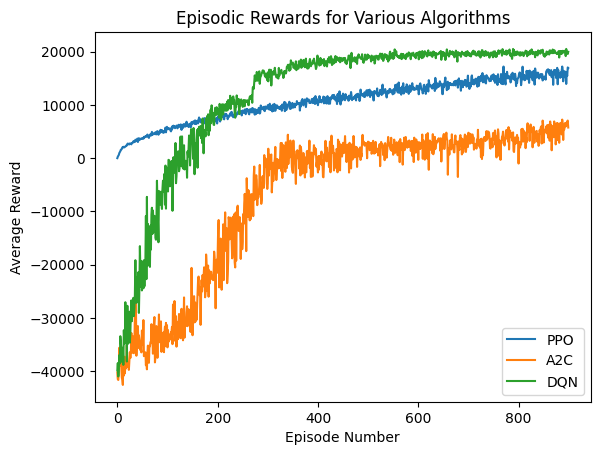

In [ ]:
plt.plot(ppo_episodic_rewards, label = 'PPO')
plt.plot(A2C_episode_rewards, label = 'A2C')
plt.plot(DQN_episodic_rewards, label = 'DQN')
plt.legend(loc = 'lower right')
plt.title('Episodic Rewards for Various Algorithms')
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')

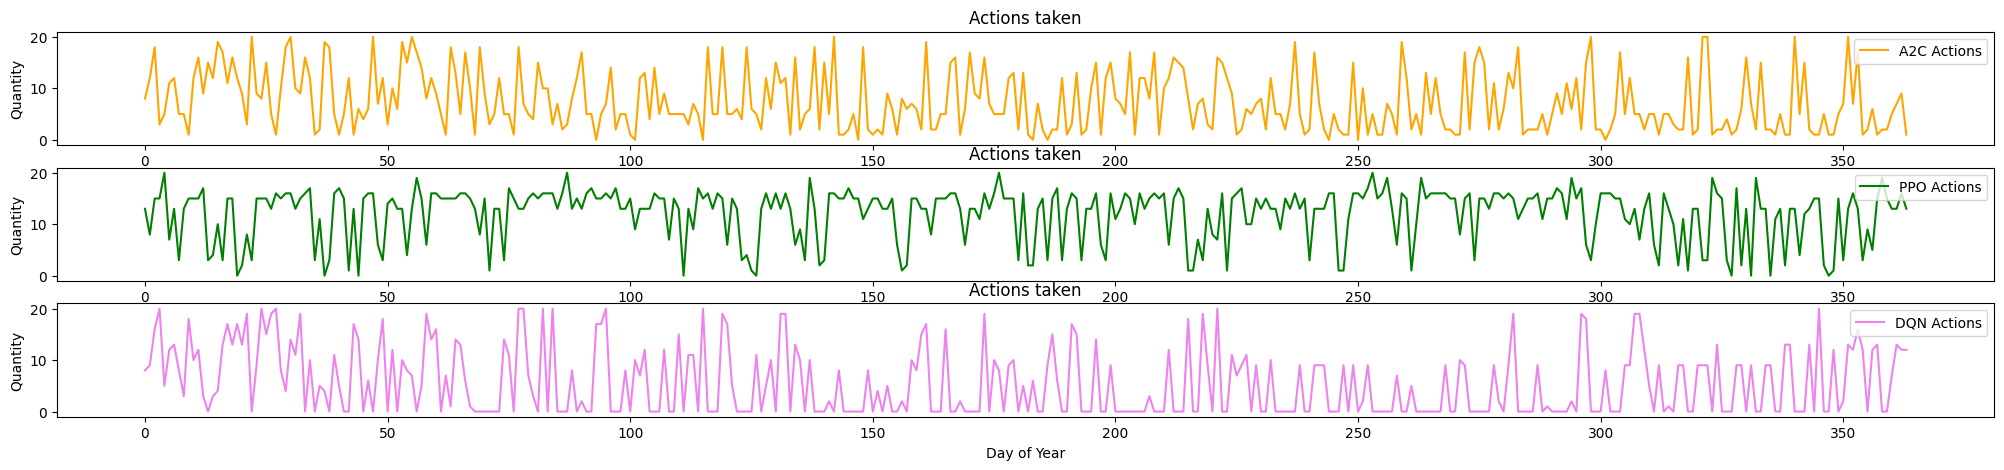

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (25, 5))
ax[0].plot(A2C_action_list[:364], label = 'A2C Actions', color = 'orange')
ax[1].plot(ppo_actions[0], label = 'PPO Actions', color = 'green')
ax[2].plot(DQN_episodic_actions[:364], label = 'DQN Actions', color = 'violet')
ax[0].set_xlabel('Day of Year')
ax[0].set_ylabel('Quantity')
ax[0].set_title('Actions taken')
ax[0].legend(loc = 'upper right')
ax[1].set_xlabel('Day of Year')
ax[1].set_ylabel('Quantity')
ax[1].set_title('Actions taken')
ax[1].legend(loc = 'upper right')
ax[2].set_xlabel('Day of Year')
ax[2].set_ylabel('Quantity')
ax[2].set_title('Actions taken')
ax[2].legend(loc = 'upper right')

In [ ]:
demand_test = generate_multiple_test_scenarios()

In [ ]:
# A2C Profit Calculation
actor = Actor(7, 21)
actions_list = []
invs_list = []
profit_A2C_RL = []

for demand in demand_test:
    env = Environment(demand)
    env.reset()
    profit = 0
    actions = []
    invs = []
    done = False
    state = env.state
    while not done:
        state = torch.from_numpy(state).float().unsqueeze(0)  # .to(device)

        with torch.no_grad():
            action_probs = actor(state)
        action = torch.multinomial(action_probs, 1).item()
        actions.append(action)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        invs.append(env.inv_level)
        profit += reward

    actions_list.append(actions)
    invs_list.append(invs)
    profit_A2C_RL.append(profit)

In [ ]:
model_QNetwork = QNetwork(state_size=7,action_size=21,seed=0)
model_QNetwork.load_state_dict(torch.load('qnetwork.pt'))

<All keys matched successfully>

In [ ]:
profit_DQN_RL = []
actions_list = []
invs_list = []

for demand in demand_test:
    env = Environment(demand)
    env.reset()
    profit = 0
    actions = []
    invs = []
    done = False
    state = env.state
    while not done:
        state = torch.from_numpy(state).float().unsqueeze(0) #.to(device)
        with torch.no_grad():
            action_values = model_QNetwork(state)
        action = np.argmax(action_values.cpu().data.numpy())
        actions.append(action)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        invs.append(env.inv_level)
        profit += reward
    actions_list.append(actions)
    invs_list.append(invs)
    profit_DQN_RL.append(profit)
RL_mean = np.mean(profit_DQN_RL)

In [ ]:
profit_sS = []
y =[]
for demand in demand_test:
    profit_sS.append(profit_calculation_sS(15,32,demand)[0])
    y.append(profit_calculation_sS(15,32,demand)[1])
sS_mean = np.mean(profit_sS)

In [ ]:
y = np.mean(y, axis = 0)

In [ ]:
y

array([21.91, 18.7 , 15.52, 12.59,  8.16,  4.49,  2.75,  4.41, 10.56,
       15.37, 12.58, 10.6 ,  6.24,  1.82,  4.24, 12.77, 14.29, 12.39,
       10.47,  6.19,  1.71,  2.59, 12.95, 14.35, 12.17,  9.72,  6.51,
        1.79,  3.64, 12.4 , 14.07, 11.96, 10.49,  6.6 ,  1.74,  2.85,
       12.48, 14.41, 12.43, 11.03,  6.17,  1.97,  3.55, 12.04, 14.65,
       12.11,  9.07,  6.58,  2.16,  2.98, 11.85, 15.23, 12.65,  9.58,
        5.03,  2.12,  3.82, 11.62, 14.67, 13.13, 11.01,  5.86,  1.67,
        3.79, 12.58, 14.15, 12.07, 10.55,  6.6 ,  2.15,  3.91, 12.3 ,
       14.32, 12.51, 10.61,  5.72,  1.46,  4.43, 12.98, 13.99, 11.92,
       10.51,  6.07,  2.01,  2.47, 11.8 , 14.3 , 11.86,  9.76,  6.68,
        1.84,  2.96, 12.46, 14.04, 11.71,  9.31,  6.21,  1.61,  3.98,
       13.14, 14.22, 12.44, 10.84,  6.84,  1.24,  3.2 , 13.75, 13.93,
       11.3 ,  9.23,  6.3 ,  1.9 ,  2.69, 12.55, 14.24, 11.93,  8.96,
        6.56,  1.84,  2.64, 12.37, 14.88, 12.46,  9.32,  6.11,  1.77,
        3.32, 12.24,

In [ ]:
average_demand = np.mean(demand_test, axis = 0)

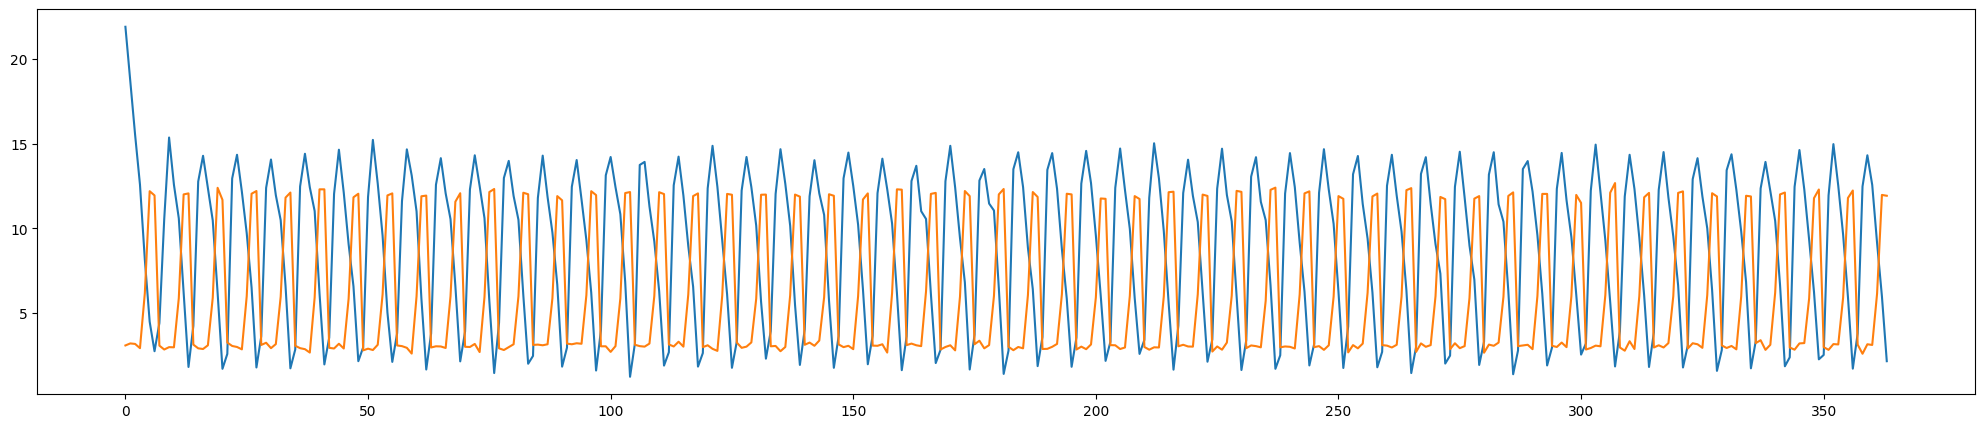

In [ ]:
plt.figure(figsize = (25, 5))
plt.plot(y)
plt.plot(average_demand)

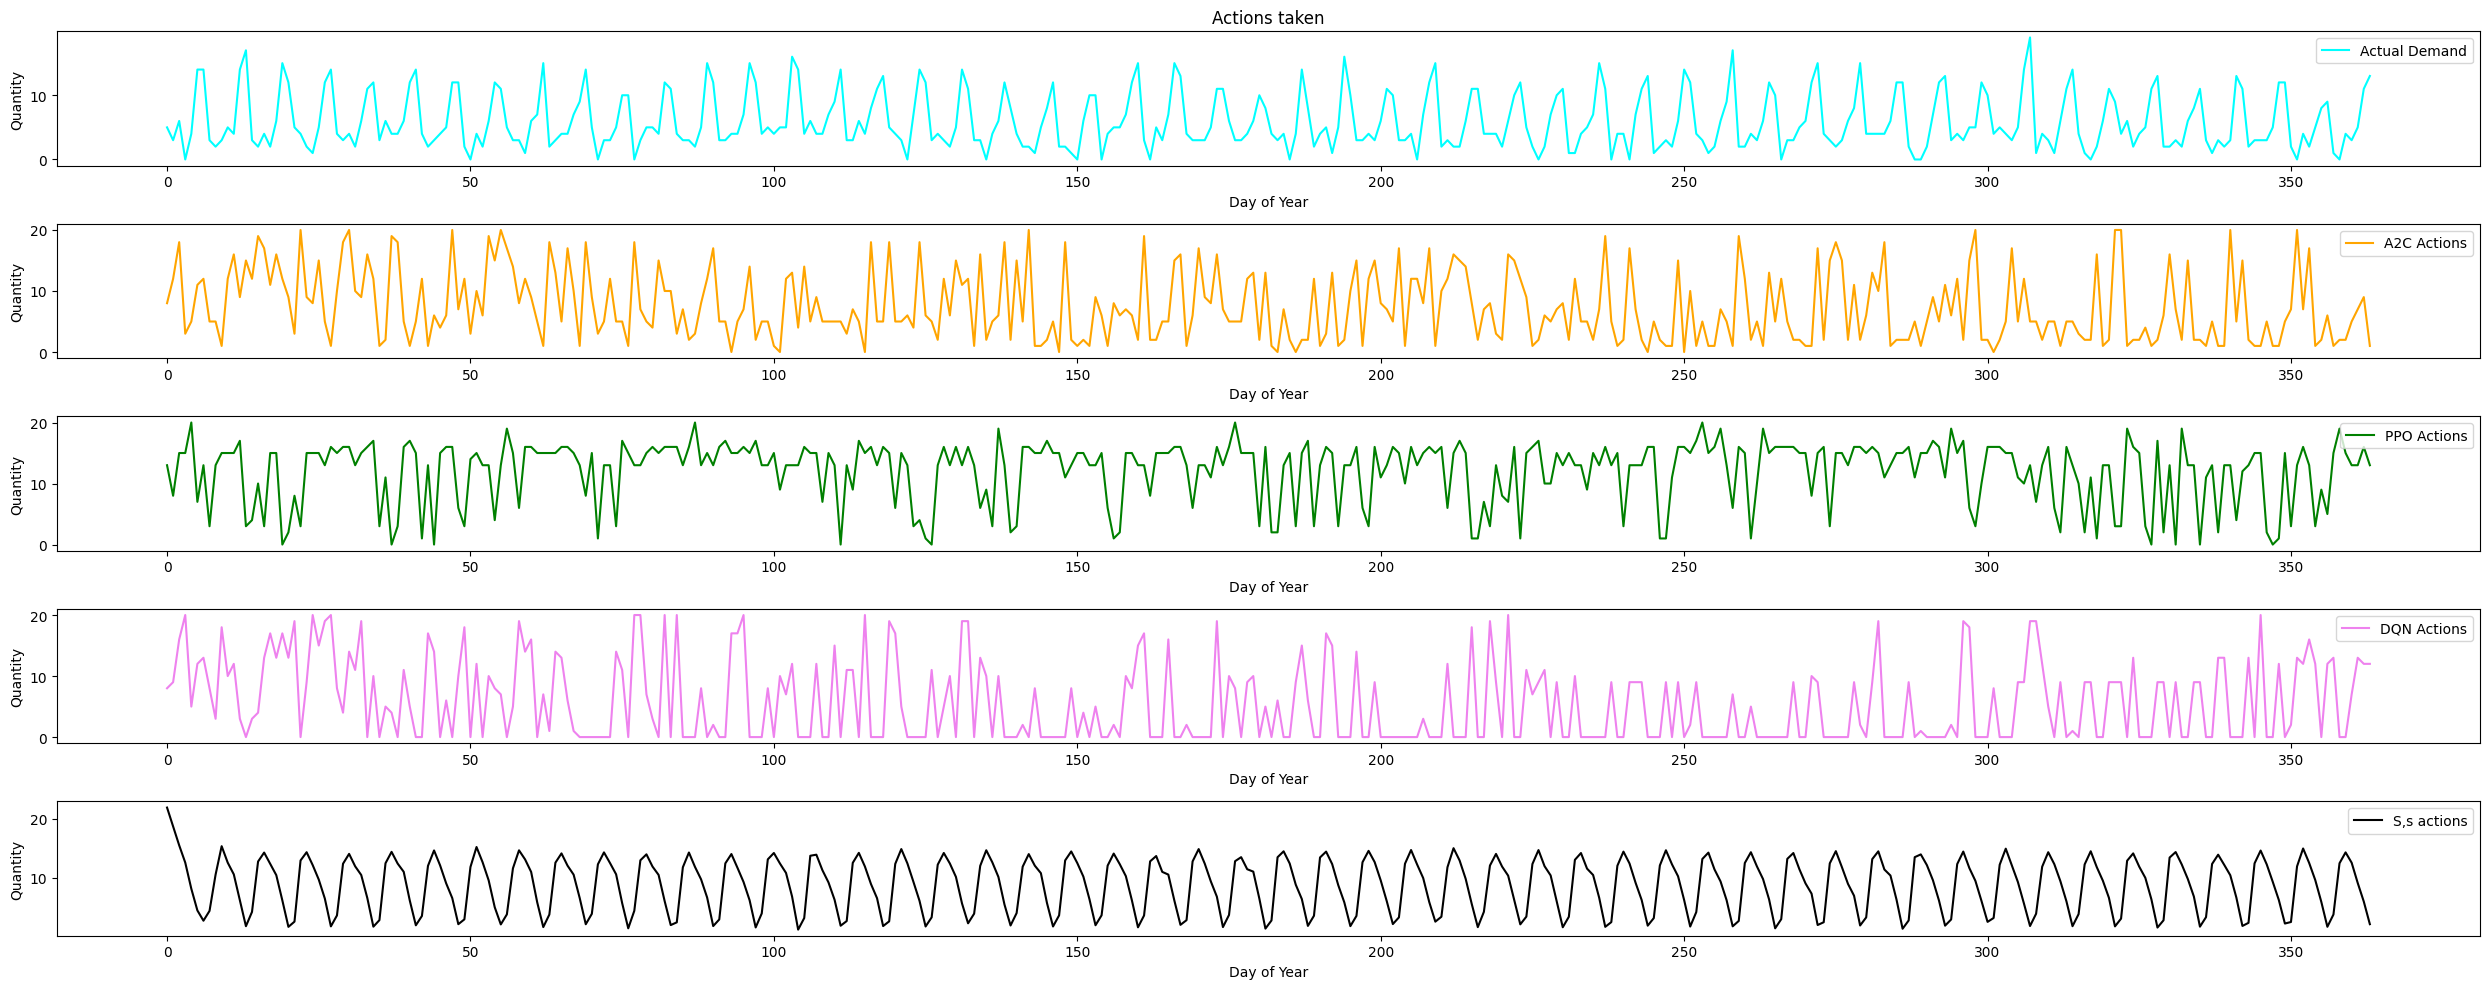

In [ ]:
fig, ax = plt.subplots(5,1, figsize = (25, 10))

ax[0].plot(demand, label = 'Actual Demand', color = 'cyan')
ax[0].set_title('Actions taken')
ax[0].set_xlabel('Day of Year')
ax[0].set_ylabel('Quantity')
ax[0].legend(loc = 'upper right')

ax[1].plot(A2C_action_list[:364], label = 'A2C Actions', color = 'orange')
ax[1].set_xlabel('Day of Year')
ax[1].set_ylabel('Quantity')
ax[1].legend(loc = 'upper right')

ax[2].plot(ppo_actions[0], label = 'PPO Actions', color = 'green')
ax[2].set_xlabel('Day of Year')
ax[2].set_ylabel('Quantity')
ax[2].legend(loc = 'upper right')

ax[3].plot(DQN_episodic_actions[:364], label = 'DQN Actions', color = 'violet')
ax[3].set_xlabel('Day of Year')
ax[3].set_ylabel('Quantity')
ax[3].legend(loc = 'upper right')

ax[4].plot(y, label = 'S,s actions', color = 'black')
ax[4].set_xlabel('Day of Year')
ax[4].set_ylabel('Quantity')
ax[4].legend(loc = 'upper right')

plt.tight_layout()

In [ ]:
import PPO

In [ ]:
checkpoint = torch.load('ppo.pt')  # Change the path to your saved model
actor = PPO.Actor(7, 21).to(device)
actor.load_state_dict(checkpoint['actor_state_dict'])

# Test the PPO agent
actions_list = []
invs_list = []
profit_ppo_RL = []

for demand in demand_test:
    env = Environment(demand)
    env.reset()
    profit = 0
    actions = []
    invs = []
    done = False
    state = env.state

    while not done:
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)

        with torch.no_grad():
            action_probs = actor(state)
        action = torch.multinomial(action_probs, 1).item()
        actions.append(action)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        invs.append(env.inv_level)
        profit += reward

    actions_list.append(actions)
    invs_list.append(invs)
    profit_ppo_RL.append(profit)

Text(0.5, 1.0, 'Comparing Profits by Different Algorithms')

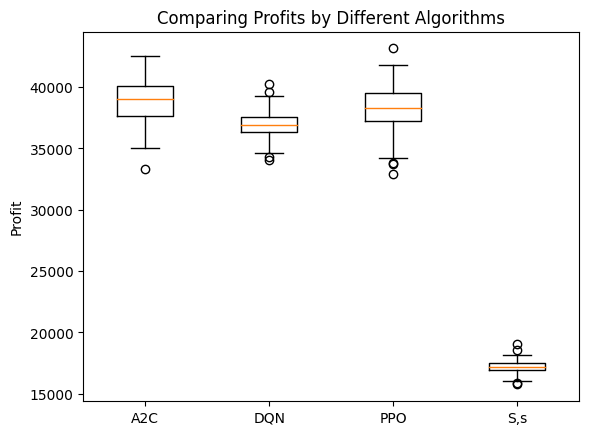

In [ ]:
plt.boxplot([-1*np.asarray(profit_A2C_RL), -1*np.asarray(profit_DQN_RL), -1*np.asarray(profit_ppo_RL), profit_sS], labels=['A2C','DQN', 'PPO', 'S,s'])
plt.ylabel('Profit')
plt.title('Comparing Profits by Different Algorithms')

In [ ]:
def calculate_quartiles(data):
    # Sort the data in ascending order
    sorted_data = np.sort(data)

    # Calculate the median (Q2)
    median = np.median(sorted_data)

    # Split the data into two halves
    lower_half = sorted_data[sorted_data < median]
    upper_half = sorted_data[sorted_data > median]

    # Calculate the lower quartile (Q1) and upper quartile (Q3)
    lower_quartile = np.median(lower_half)
    upper_quartile = np.median(upper_half)

    return lower_quartile, median, upper_quartile

In [ ]:
print(calculate_quartiles(-1*np.asarray(profit_A2C_RL)))

(37615.0, 39022.0, 40083.5)


In [ ]:
print(calculate_quartiles(-1*np.asarray(profit_DQN_RL)))

(36296.0, 36937.5, 37531.0)


In [ ]:
print(calculate_quartiles(-1*np.asarray(profit_ppo_RL)))

(37211.5, 38265.5, 39576.5)


In [ ]:
print(calculate_quartiles(profit_sS))

(16909.0, 17178.5, 17510.5)


In [ ]:
(np.mean(-1*np.asarray(profit_ppo_RL))-np.mean(profit_sS))/(np.mean(profit_sS))*100

122.66208505017997

In [ ]:
(np.mean(-1*np.asarray(profit_A2C_RL))-np.mean(profit_sS))/(np.mean(profit_sS))*100

126.00964534521404

In [ ]:
(np.mean(-1*np.asarray(profit_DQN_RL))-np.mean(profit_sS))/(np.mean(profit_sS))*100

114.3140829481086